# EDA with Visuals
Creating visualizations to answer questions

In [16]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_theme()
import warnings
warnings.filterwarnings('ignore')

In [17]:
# Import cleaned dataset
wine_df = pd.read_csv('Data/winequality_edited.csv')

In [18]:
wine_df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


### Histograms for Various Features

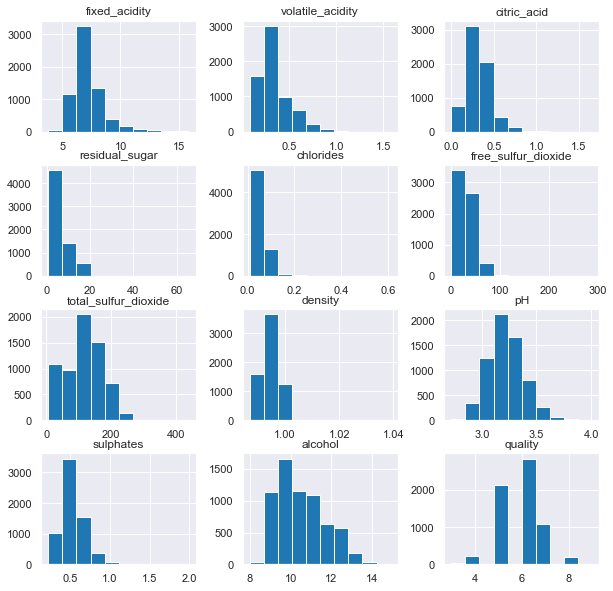

In [19]:
# Plotting histograms 
wine_df.hist(figsize=(10,10), color='#1f77b4');
# Save the figure.
plt.savefig("Visuals/histogram.png")

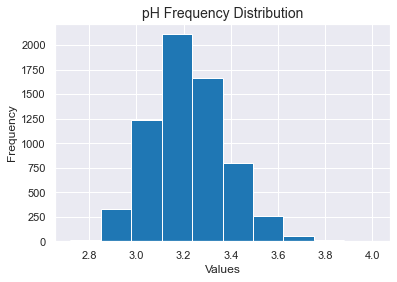

In [28]:
wine_df.pH.hist(color='#1f77b4');
plt.xlabel('Values', fontsize=12);
plt.ylabel('Frequency', fontsize=12);
plt.title("pH Frequency Distribution", fontsize=14);
# Save the figure.
plt.savefig("Visuals/pHhist.png")

*The most frequent pH value is around 3.2.*

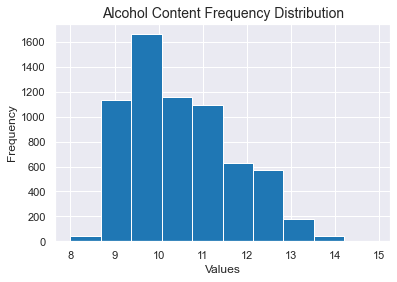

In [30]:
wine_df.alcohol.hist(color='#1f77b4');
plt.xlabel('Values', fontsize=12);
plt.ylabel('Frequency', fontsize=12);
plt.title("Alcohol Content Frequency Distribution", fontsize=14);
# Save the figure.
plt.savefig("Visuals/alchist.png")

*Histogram for Alcohol level is right skewed.*

### Correlations

In [31]:
# select the columns that we want to check: Volatile Acidity, Residual Sugar, pH, Alcohol
coeficient_df = wine_df.iloc[:,np.r_[1, 3, 8, 10, 11]]
coeficient_df.head(2)

,volatile_acidity,residual_sugar,pH,alcohol,quality
0,0.70,1.9,3.51,9.4,5
1,0.88,2.6,3.20,9.8,5


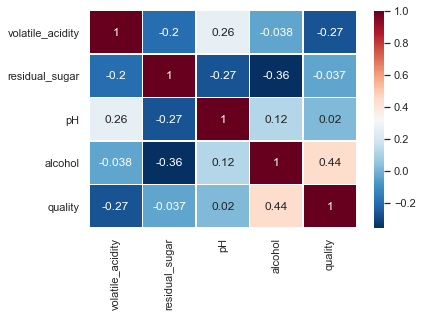

In [32]:
# Correlation coef for selected columns
pearsoncorr = coeficient_df.corr(method='pearson')
import seaborn as sb
sb.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5);

# Save the figure.
plt.savefig("Visuals/corr.png")

*Correlation between alcohol content and quality rating is 0.44. This indicates weak positive correlation, while residual sugar with the value of -0.037 indicates almost no correlation.*


### Information from the dataset using group by

In [33]:
# Find a mean for wine characteristics based on the quality
wine_df.groupby('quality').mean()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,7.853333,0.517000,0.281000,5.140000,0.077033,39.216667,122.033333,0.995744,3.257667,0.506333,10.215000
4,7.288889,0.457963,0.272315,4.153704,0.060056,20.636574,103.432870,0.994833,3.231620,0.505648,10.180093
5,7.326801,0.389614,0.307722,5.804116,0.064666,30.237371,120.839102,0.995849,3.212189,0.526403,9.837783
6,7.177257,0.313863,0.323583,5.549753,0.054157,31.165021,115.410790,0.994558,3.217726,0.532549,10.587553
7,7.128962,0.288800,0.334764,4.731696,0.045272,30.422150,108.498610,0.993126,3.228072,0.547025,11.386006
8,6.835233,0.291010,0.332539,5.382902,0.041124,34.533679,117.518135,0.992514,3.223212,0.512487,11.678756
9,7.420000,0.298000,0.386000,4.120000,0.027400,33.400000,116.000000,0.991460,3.308000,0.466000,12.180000


In [34]:
# Find a mean for wine characteristics based on the quality and color
wine_df.groupby(['quality', 'color']).mean()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
quality color                                                                 
3       red         8.360000          0.884500     0.171000        2.635000   
        white       7.600000          0.333250     0.336000        6.392500   
4       red         7.779245          0.693962     0.174151        2.694340   
        white       7.129448          0.381227     0.304233        4.628221   
5       red         8.167254          0.577041     0.243686        2.528855   
        white       6.933974          0.302011     0.337653        7.334969   
6       red         8.347179          0.497484     0.273824        2.477194   
        white       6.837671          0.260564     0.338025        6.441606   
7       red         8.872362          0.403920     0.375176        2.720603   
        white       6.734716          0.262767     0.325625        5.186477   
8       red         8.566667          0.423333     0.391111        2.577778   
        white       6.657143          0.277400     0.326514        5.671429   
9       white       7.420000          0.298000     0.386000        4.120000   

               chlorides  free_sulfur_dioxide  total_sulfur_dioxide   density  \
quality color                                                                   
3       red     0.122500            11.000000             24.900000  0.997464   
        white   0.054300            53.325000            170.600000  0.994884   
4       red     0.090679            12.264151             36.245283  0.996542   
        white   0.050098            23.358896            125.279141  0.994277   
5       red     0.092736            16.983847             56.513950  0.997104   
        white   0.051546            36.432052            150.904598  0.995263   
6       red     0.084956            15.711599             40.869906  0.996615   
        white   0.045217            35.650591            137.047316  0.993961   
7       red     0.076588            14.045226             35.020101  0.996104   
        white   0.038191            34.125568            125.114773  0.992452   
8       red     0.068444            13.277778             33.444444  0.995212   
        white   0.038314            36.720000            126.165714  0.992236   
9       white   0.027400            33.400000            116.000000  0.991460   

                     pH  sulphates    alcohol  
quality color                                  
3       red    3.398000   0.570000   9.955000  
        white  3.187500   0.474500  10.345000  
4       red    3.381509   0.596415  10.265094  
        white  3.182883   0.476135  10.152454  
5       red    3.304949   0.620969   9.899706  
        white  3.168833   0.482203   9.808840  
6       red    3.318072   0.675329  10.629519  
        white  3.188599   0.491106  10.575372  
7       red    3.290754   0.741256  11.465913  
        white  3.213898   0.503102  11.367936  
8       red    3.267222   0.767778  12.094444  
        white  3.218686   0.486229  11.636000  
9       white  3.308000   0.466000  12.180000

In [35]:
# Skip the index and limit to one column of intetest
# Find a mean for wine characteristics based on the quality and color
wine_df.groupby(['quality', 'color'], as_index=False)['pH'].mean()

,quality,color,pH
0,3,red,3.398000
1,3,white,3.187500
2,4,red,3.381509
3,4,white,3.182883
4,5,red,3.304949
5,5,white,3.168833
6,6,red,3.318072
7,6,white,3.188599
8,7,red,3.290754
9,7,white,3.213898
